In [1]:
from __future__ import annotations

# Standard library
import json
from hashlib import sha256
from pathlib import Path
from typing import TYPE_CHECKING, Protocol, TypeVar

# Third-party libraries
import numpy as np
from rich.console import Console

# Local libraries

if TYPE_CHECKING:
    from networkx import DiGraph

# Global constants
SCRIPT_NAME = ""
CWD = Path.cwd()
DATA = Path(CWD / "__data__" / SCRIPT_NAME)
DATA.mkdir(exist_ok=True)
SEED = 42

# Global functions
console = Console()
RNG = np.random.default_rng(SEED)


# Type Aliases and TypeVars
T = TypeVar("T")

# Concrete value aliases (don't use TypeVar for concrete aliases)
NumericProperty = int | float
NonNumProperty = str | bool | list | tuple | dict | set
GraphProperty = NumericProperty | NonNumProperty

# Index of a graph in the population
type GraphIndex = int
type IndexMappings = list[GraphIndex]

# Derived property can be a value or list of indexes
DerivedProperty = GraphProperty | IndexMappings

# name aliases
type GraphPropertyName = str
type DerivedPropertyName = str

# Generic mapping when values are homogeneous (use NamedGraphPropertiesT[T])
NamedGraphPropertiesT = dict[GraphPropertyName, T]
# Backwards-compatible mixed container
type NamedGraphProperties = dict[GraphPropertyName, GraphProperty]


# Generic analyzer Protocol: callable that returns dict[str, T]
class PropertyAnalyzer(Protocol[T]):
    def __call__(self, individual: DiGraph) -> NamedGraphPropertiesT[T]: ...

In [2]:
def analyze_canonical_subtrees(individual: DigGraph) -> NamedGraphPropertiesT:
    # from child, find parents, 
    # canonciallize subtree
    # move up
    # repeat
    
    # list = [subtrees]
    pass


In [3]:
from ariel.body_phenotypes.robogen_lite.decoders.hi_prob_decoding import save_graph_as_json, draw_graph
import json

def to_json_from_json(graph) -> None:
    save_graph_as_json(graph, save_file="__data__/hi.json")
    with open("__data__/hi.json", "r") as f:
        data = json.load(f)

        nodes = data.get("nodes", [])
        edges = data.get("edges", [])

        # sort nodes by 'id' (None / missing ids go last)
        nodes_sorted = sorted(nodes, key=lambda n: (n.get("id") is None, n.get("id")))

        # sort edges by 'id' if present, otherwise by (source, target)
        def edge_key(e: dict):
            if "id" in e:
                return (0, e.get("id"))
            return (1, e.get("source"), e.get("target"))

        edges_sorted = sorted(edges, key=edge_key)

        print("nodes:")
        print(json.dumps(nodes_sorted, indent=2, sort_keys=True, ensure_ascii=False))

        print("\nedges:")
        print(json.dumps(edges_sorted, indent=2, sort_keys=True, ensure_ascii=False))

In [4]:
def change_attributes(G, node_id):
    print(G.nodes[node_id])

In [5]:
# def annotate_nodes_with_parent_edge(tree: nx.DiGraph, root = 0):
#     """
#     Adds a 'parent_edge' attribute to each node, containing the edge
#     (parent, child, edge_data) connecting it to its parent.
    
#     Parameters
#     ----------
#     tree : nx.DiGraph
#         Input tree (directed)
#     root : node
#         Root node of the tree

#     Returns
#     -------
#     None
#         Modifies the tree in-place
#     """
#     for node in tree.nodes():
#         if node == root:
#             continue
#         else:
#             parent = list(tree.predecessors(node))[0]  # unique parent
#             edge_data = tree.get_edge_data(parent, node)
#             tree.nodes[node]['parent_edge'] = (parent, node, edge_data)

In [6]:
from ariel_experiments.utils.initialize import generate_random_individual
from ariel_experiments.gui_vis.visualize_tree import visualize_tree_from_graph
import networkx as nx
import matplotlib.pyplot as plt


G = generate_random_individual()

leaf_nodes = [n for n, d in G.out_degree() if d == 0]
print("Leaf nodes:", leaf_nodes)


# to_json_from_json(G)


# print(G.nodes(data=True))
# print(G.edges(data=True))

# graph = dfs_tree()

# children = list(G.successors(leaf_nodes[0]))

print(leaf_nodes[0])


G.nodes[leaf_nodes[0]]["parent"] = 0

print(G.nodes[leaf_nodes[0]])


# print(change_attributes(G, leaf_nodes[0]))



# for parent in G.nodes():
#     children = list(G.successors(parent))
#     print(f"{parent} → {children}")

# visualize_tree_from_graph(G, save_file="graph.png")


# visualize_tree_from_graph(G, save_file="graph.png", make_tree=False)


# draw_graph(G)

{10: ModuleInstance(type=<ModuleType.BRICK: 1>, rotation=<ModuleRotationsIdx.DEG_180: 4>, links={<ModuleFaces.BOTTOM: 5>: 17, <ModuleFaces.LEFT: 3>: 19, <ModuleFaces.FRONT: 0>: 3, <ModuleFaces.RIGHT: 2>: 16, <ModuleFaces.TOP: 4>: 15}), 0: ModuleInstance(type=<ModuleType.CORE: 0>, rotation=<ModuleRotationsIdx.DEG_0: 0>, links={<ModuleFaces.RIGHT: 2>: 10, <ModuleFaces.TOP: 4>: 13, <ModuleFaces.BACK: 1>: 8, <ModuleFaces.BOTTOM: 5>: 9}), 17: ModuleInstance(type=<ModuleType.NONE: 3>, rotation=<ModuleRotationsIdx.DEG_0: 0>, links={}), 19: ModuleInstance(type=<ModuleType.NONE: 3>, rotation=<ModuleRotationsIdx.DEG_0: 0>, links={}), 3: ModuleInstance(type=<ModuleType.BRICK: 1>, rotation=<ModuleRotationsIdx.DEG_270: 6>, links={<ModuleFaces.TOP: 4>: 14, <ModuleFaces.RIGHT: 2>: 2, <ModuleFaces.BOTTOM: 5>: 7}), 14: ModuleInstance(type=<ModuleType.NONE: 3>, rotation=<ModuleRotationsIdx.DEG_0: 0>, links={}), 16: ModuleInstance(type=<ModuleType.HINGE: 2>, rotation=<ModuleRotationsIdx.DEG_180: 4>, link

In [7]:
def add_parent_to_all_trees(graph: BiGraph):
    for node in graph.nodes():
        if node == 0:
            print('root found')
            graph.nodes[node]['parent'] = None  # root has no parent
        else:
            print('other found')
            parent = list(graph.predecessors(node))[0]  # unique parent
            edge_data = graph.get_edge_data(parent, node)
            graph.nodes[node]['parent'] = edge_data
    
    # return graph

In [8]:
add_parent_to_all_trees(G)


# print(G)

print(leaf_nodes[0])

to_json_from_json(G)

# print(leaf_nodes[0])


# print(G.nodes[leaf_nodes[0]])


# print(change_attributes(G, leaf_nodes[0]))


other found
other found
other found
other found
other found
other found
root found
other found
other found
other found
other found
other found
other found
other found
other found
other found
other found
other found
other found
other found
17
nodes:
[
  {
    "id": 0,
    "parent": null,
    "rotation": "DEG_0",
    "type": "CORE"
  },
  {
    "id": 1,
    "parent": {
      "face": "FRONT"
    },
    "rotation": "DEG_270",
    "type": "BRICK"
  },
  {
    "id": 2,
    "parent": {
      "face": "RIGHT"
    },
    "rotation": "DEG_180",
    "type": "HINGE"
  },
  {
    "id": 3,
    "parent": {
      "face": "FRONT"
    },
    "rotation": "DEG_270",
    "type": "BRICK"
  },
  {
    "id": 4,
    "parent": {
      "face": "TOP"
    },
    "rotation": "DEG_0",
    "type": "NONE"
  },
  {
    "id": 5,
    "parent": {
      "face": "LEFT"
    },
    "rotation": "DEG_90",
    "type": "HINGE"
  },
  {
    "id": 6,
    "parent": {
      "face": "FRONT"
    },
    "rotation": "DEG_0",
    "type": "

In [9]:
def normalize_node_ids(graph: nx.Graph | nx.DiGraph, *, method: str = "sorted", root: int = 0):
    """
    Return a copy of `graph` with node ids remapped to 0..n-1 and the mapping dict.
    method:
      - "sorted" : sort node keys (good when ids are ints/strs you want ordered)
      - "bfs"    : BFS order from `root` (preserves tree traversal order)
      - "default": keep current iteration order (useful for quick stable remap)
    Returns (new_graph, mapping) where mapping: old_id -> new_id.
    """
    nodes = list(graph.nodes())
    if method == "sorted":
        try:
            ordered = sorted(nodes)
        except TypeError:
            ordered = list(nodes)
    elif method == "bfs":
        ordered = list(nx.bfs_tree(graph, root).nodes())
    else:  # "default"
        ordered = nodes

    mapping = {old: i for i, old in enumerate(ordered)}
    new_graph = nx.relabel_nodes(graph, mapping, copy=True)
    return new_graph, mapping

In [10]:
a, b = normalize_node_ids(G)

print(a)

print(b)

DiGraph with 20 nodes and 19 edges
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19}


[18:14:59] saving file to                                                                     ]8;id=704699;file:///home/salo/projects/ariel-zoo/src/ariel_experiments/gui_vis/visualize_tree.py\visualize_tree.py]8;;\:]8;id=147195;file:///home/salo/projects/ariel-zoo/src/ariel_experiments/gui_vis/visualize_tree.py#526\526]8;;\
           /home/salo/projects/ariel-zoo/src/ariel_experiments/characterize/__data__/graph.pn                      
           g                                                                                                       

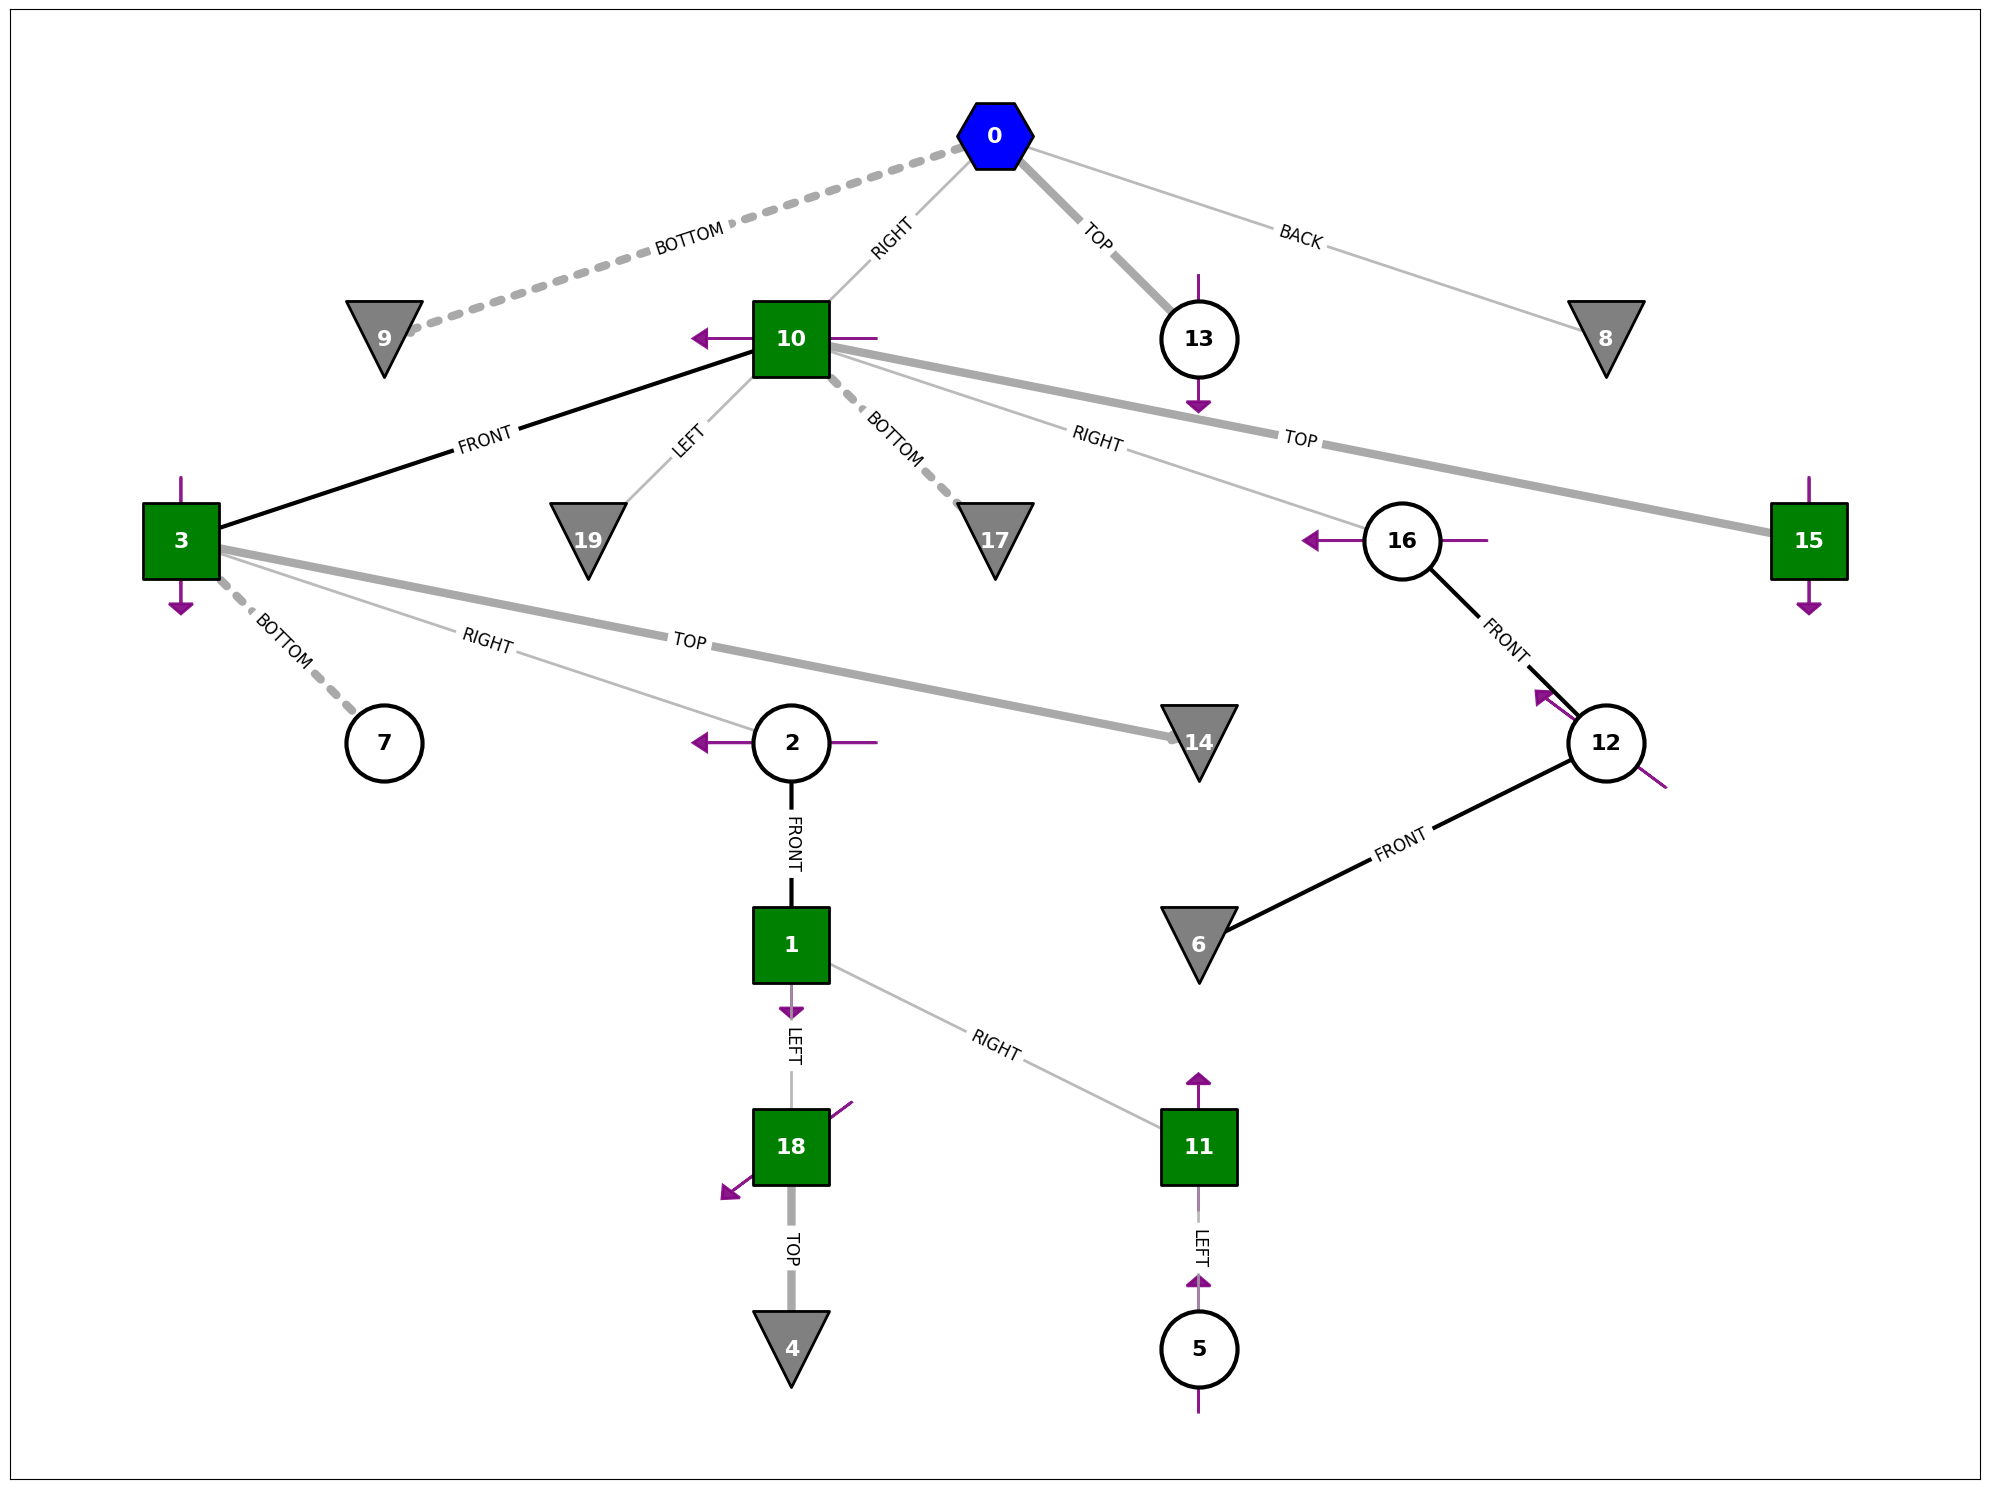

[18:15:01] saving file to                                                                     ]8;id=313609;file:///home/salo/projects/ariel-zoo/src/ariel_experiments/gui_vis/visualize_tree.py\visualize_tree.py]8;;\:]8;id=371600;file:///home/salo/projects/ariel-zoo/src/ariel_experiments/gui_vis/visualize_tree.py#526\526]8;;\
           /home/salo/projects/ariel-zoo/src/ariel_experiments/characterize/__data__/graph.pn                      
           g                                                                                                       

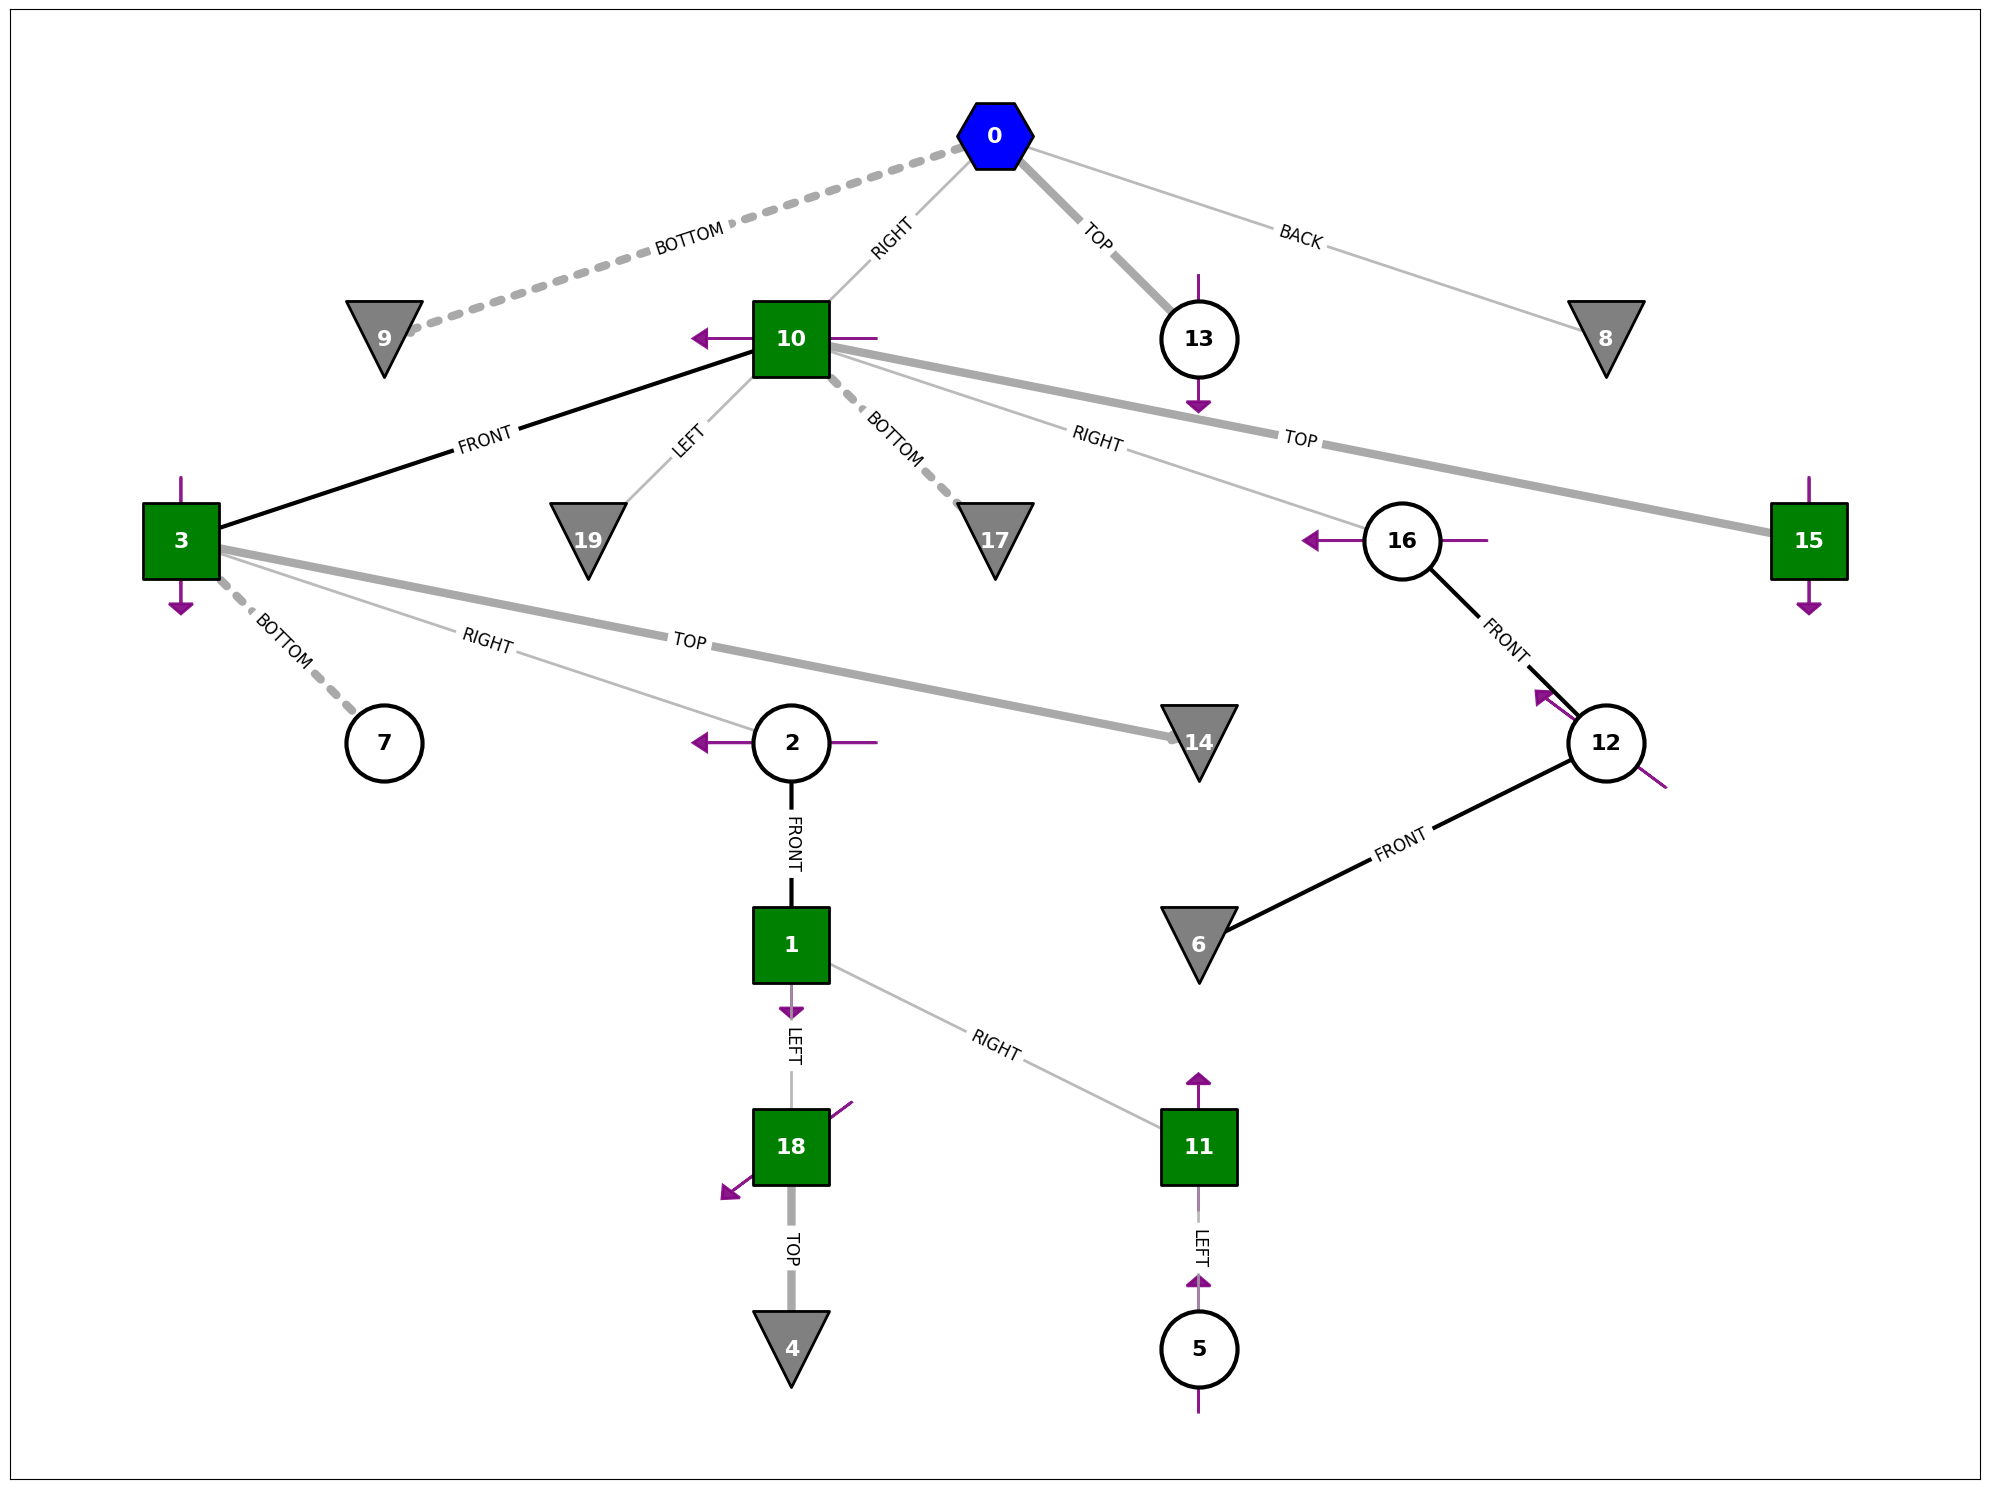

In [11]:
visualize_tree_from_graph(G, save_file="graph.png")


visualize_tree_from_graph(G, save_file="graph.png", make_tree=False)

I want to use network x for the sub trees also, as this is the datastructure used for everything else

In [12]:
from typing import TypedDict

In [13]:
generate_random_individual()

{18: ModuleInstance(type=<ModuleType.NONE: 3>, rotation=<ModuleRotationsIdx.DEG_0: 0>, links={}), 0: ModuleInstance(type=<ModuleType.CORE: 0>, rotation=<ModuleRotationsIdx.DEG_0: 0>, links={<ModuleFaces.LEFT: 3>: 18, <ModuleFaces.RIGHT: 2>: 1, <ModuleFaces.BACK: 1>: 16, <ModuleFaces.TOP: 4>: 9}), 1: ModuleInstance(type=<ModuleType.HINGE: 2>, rotation=<ModuleRotationsIdx.DEG_90: 2>, links={<ModuleFaces.FRONT: 0>: 2}), 16: ModuleInstance(type=<ModuleType.HINGE: 2>, rotation=<ModuleRotationsIdx.DEG_90: 2>, links={<ModuleFaces.FRONT: 0>: 15}), 9: ModuleInstance(type=<ModuleType.HINGE: 2>, rotation=<ModuleRotationsIdx.DEG_225: 5>, links={<ModuleFaces.FRONT: 0>: 8}), 8: ModuleInstance(type=<ModuleType.HINGE: 2>, rotation=<ModuleRotationsIdx.DEG_225: 5>, links={}), 2: ModuleInstance(type=<ModuleType.HINGE: 2>, rotation=<ModuleRotationsIdx.DEG_90: 2>, links={<ModuleFaces.FRONT: 0>: 3}), 15: ModuleInstance(type=<ModuleType.NONE: 3>, rotation=<ModuleRotationsIdx.DEG_0: 0>, links={}), 3: ModuleIn

In [14]:
class core(TypedDict):
    type: str = "CORE"
    rotation: int
    front: dict
    sides: [dict, dict, dict, dict, dict]

In [15]:
class brick(TypedDict):
    parent:
    type: str = "BRICK"
    front: dict
    rotation: int
    sides: [dict, dict, dict, dict]

╭──────────────────────────────────────────────────────────────────────────────────────────────────╮
│     parent:                                                                                      │
│            ▲                                                                                     │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
SyntaxError: invalid syntax

In [ ]:
class edge(TypedDict):
    parent:
    type: str
    front: dict
    rotation: int
    sides: [dict, dict, dict, dict]

In [ ]:
B, mapping = normalize_node_ids_postorder(G)
print(mapping)

to_json_from_json(B)

In [ ]:
draw_graph(B)

visualize_tree_from_graph(B, save_file="graph.png")

In [ ]:
class TreeNode:
    parent  # Reference to parent node (or None if root)
    # Named children for easy access/mutation
    
    
    children = {
        "left": None,
        "right": None,
        "top": None,
        "bottom": None,
    }

    # def set_child(self, position, child_node):
    #     self.children[position] = child_node
    #     if child_node is not None:
    #         child_node.parent = self

    # def get_child(self, position):
    #     return self.children.get(position)

    # def get_parent(self):
    #     return self.parent

In [ ]:
from dataclasses import dataclass, field
from typing import Optional, List, Dict
from pydantic import BaseModel

from ariel.body_phenotypes.robogen_lite.config import (
    ALLOWED_FACES, ModuleType, ModuleFaces, ALLOWED_ROTATIONS
)

class CanonicalPart(BaseModel):
    parent: Optional["CanonicalPart"] = None
    rotation: int = 0  # Must be in range(len(ALLOWED_ROTATIONS))

    def normalize_rotation(self):
        """Normalize rotation recursively for this part and its children."""
        # Example: set rotation to 0 and normalize all children
        self.rotation = 0
        if hasattr(self, "sides"):
            for child in getattr(self, "sides"):
                if isinstance(child, CanonicalPart):
                    child.normalize_rotation()
        if hasattr(self, "front") and isinstance(self.front, CanonicalPart):
            self.front.normalize_rotation()

    def save_subtree_hash(self):
        """Compute and return a hash for the subtree rooted at this part."""
        # Example: hash type, rotation, and hashes of children
        children_hashes = []
        if hasattr(self, "sides"):
            for child in getattr(self, "sides"):
                if isinstance(child, CanonicalPart):
                    children_hashes.append(child.save_subtree_hash())
                else:
                    children_hashes.append(str(child))
        if hasattr(self, "front") and isinstance(self.front, CanonicalPart):
            children_hashes.append(self.front.save_subtree_hash())
        return hash((getattr(self, "type", None), self.rotation, tuple(children_hashes)))


CORE_SIDE_FACES = [
    face for face in ALLOWED_FACES[ModuleType.CORE] if face != ModuleFaces.FRONT
]

BRICK_SIDE_FACES = [
    face for face in ALLOWED_FACES[ModuleType.BRICK] if face != ModuleFaces.FRONT
]

HINGE_SIDE_FACES = [
   face for face in ALLOWED_FACES[ModuleType.HINGE] if face != ModuleFaces.FRONT 
]
@dataclass
class Core(CanonicalPart):    
    type: str = "CORE"
    front: CanonicalPart | None = None
    sides: list[CanonicalPart] = field(default_factory=lambda: [None]*CORE_SIDE_FACES)

@dataclass
class Brick(CanonicalPart):
    type: str = "BRICK"
    front: CanonicalPart | None = None
    sides: list[CanonicalPart | None] = field(default_factory=lambda: [None]*BRICK_SIDE_FACES)

@dataclass
class Edge(CanonicalPart):
    type: str = "EDGE"
    front: CanonicalPart | None = None
    sides: list[CanonicalPart | None] = field(default_factory=lambda: [None]*)
    
class Nonetype(Part):
    type: str = "EDGE"
    front: CanonicalPart | None = None
    sides: list[CanonicalPart | None] = field(default_factory=lambda: [None]*)

In [ ]:
from dataclasses import dataclass, field, make_dataclass
from typing import Optional, List, Dict, Type
from pydantic import BaseModel

from ariel.body_phenotypes.robogen_lite.config import (
    ALLOWED_FACES, ModuleType, ModuleFaces, ALLOWED_ROTATIONS
)

class CanonicalPart(BaseModel):
    parent: Optional["CanonicalPart"] = None
    rotation: int = 0

    def normalize_rotation(self):
        pass
        # self.rotation = 0
        # if hasattr(self, "sides"):
        #     for child in getattr(self, "sides"):
        #         if isinstance(child, CanonicalPart):
        #             child.normalize_rotation()
        # if hasattr(self, "front") and isinstance(self.front, CanonicalPart):
        #     self.front.normalize_rotation()

    def save_subtree_hash(self):
        pass
        # children_hashes = []
        # if hasattr(self, "sides"):
        #     for child in getattr(self, "sides"):
        #         if isinstance(child, CanonicalPart):
        #             children_hashes.append(child.save_subtree_hash())
        #         else:
        #             children_hashes.append(str(child))
        # if hasattr(self, "front") and isinstance(self.front, CanonicalPart):
        #     children_hashes.append(self.front.save_subtree_hash())
        # return hash((getattr(self, "type", None), self.rotation, tuple(children_hashes)))

# Helper to get side faces for a module type (excluding FRONT)
def get_side_faces(module_type):
    return [face for face in ALLOWED_FACES[module_type] if face != ModuleFaces.FRONT]

# Dynamically create dataclasses for each module type
def make_part_class(module_type: ModuleType) -> Type[CanonicalPart]:
    side_faces = [face for face in ALLOWED_FACES[module_type] if face != ModuleFaces.FRONT]
    n_sides = len(side_faces)
    type_str = module_type.name

    return make_dataclass(
        type_str.capitalize(),
        [
            ("type", str, field(default=type_str)),
            ("front", Optional[CanonicalPart], field(default=None)),
            ("sides", List[Optional[CanonicalPart]], field(default_factory=lambda: [None]*n_sides)),
        ],
        bases=(CanonicalPart,),
        frozen=False
    )

Core = make_part_class(ModuleType.CORE)
Brick = make_part_class(ModuleType.BRICK)
Hinge = make_part_class(ModuleType.HINGE)

# Now you can instantiate without arguments:
core = Core()
brick = Brick()
hinge = Hinge()

In [ ]:
from dataclasses import make_dataclass, field
from typing import Optional, List, Type
from pydantic import BaseModel
from ariel.body_phenotypes.robogen_lite.config import ALLOWED_FACES, ModuleType, ModuleFaces

class CanonicalPart(BaseModel):
    id: int
    parent: Optional["CanonicalPart"] = None
    rotation: int = 0
    type: ModuleType.name
    front: canonicalpart
    sides: List[Optional[CanonicalPart]], field(default_factory=lambda: [None]*n_sides)

    def normalize_rotation(self):
        pass
    def save_subtree_hash(self):
        pass

def make_part_class(module_type: ModuleType) -> Type[CanonicalPart]:
    side_faces = [face for face in ALLOWED_FACES[module_type] if face != ModuleFaces.FRONT]
    n_sides = len(side_faces)
    type_str = module_type.name

    return make_dataclass(
        type_str.capitalize(),
        [
            ("type", str, field(default=type_str)),
            ("front", Optional[CanonicalPart], field(default=None)),
            ("sides", List[Optional[CanonicalPart]], field(default_factory=lambda: [None]*n_sides)),
        ],
        bases=(CanonicalPart,),
        frozen=False
    )

Core = make_part_class(ModuleType.CORE)
Brick = make_part_class(ModuleType.BRICK)
Hinge = make_part_class(ModuleType.HINGE)

# Now you can instantiate without arguments:
core = Core(None, None, None)
# brick = Brick()
# hinge = Hinge()

In [ ]:
# from networkx to this repr

# from _graph to this rpr

# from this to _graph rpr?

In [ ]:
``

In [ ]:
``